In [1]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib.colors 


mypath_O1T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4C/O_1T/"
mypath_R1T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4C/R_1T/"
mypath_O24T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4C/O_24T/"
mypath_R24T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4C/R_24T/"

def read_files(path):  
    
    # N, E, M in struct [Type, Value, File]
    N = np.zeros((2000-1, 10))
    E = np.zeros((2000-1, 10))
    M = np.zeros((2000-1, 10))
    AC = np.zeros((2000-1, 10))
    
    file_counter = 0
    for filename in os.listdir(path):
        with open(path + filename, 'r') as infile:
            lines = infile.readlines()[3:]
            line_counter = 0
            for line in lines:
                line = line.split()
                N[line_counter, file_counter] = (float(line[0]))
                E[line_counter, file_counter] = (float(line[1]))
                M[line_counter, file_counter] = (float(line[2]))
                AC[line_counter, file_counter] = (float(line[3]))
                line_counter += 1
        file_counter += 1
    
    # N
    Avg_N = np.mean(N, axis = 1)
    Avg_E = np.mean(E, axis = 1)
    Avg_M = np.mean(M, axis = 1)
    Avg_AC = np.mean(AC, axis = 1)
    Std_E = np.std(E, axis = 1)
    Std_M = np.std(M, axis = 1)
    Std_AC = np.std(AC, axis = 1)
    
    dE = np.zeros(len(Avg_E))
    for i in range(len(Avg_E)-1):
        dE[i] = Avg_E[i+1]- Avg_E[i]
    

    return Avg_N[:-1], Avg_E[:-1], Std_E[:-1], Avg_M[:-1], Std_M[:-1], Avg_AC[:-1], Std_AC[:-1], dE

DO1T = read_files(mypath_O1T)
DR1T = read_files(mypath_R1T)
DO24T = read_files(mypath_O24T)
DR24T = read_files(mypath_R24T)

analytical_values = np.load('analytical_values.npy')

In [2]:
import seaborn as sns
fsize = 30

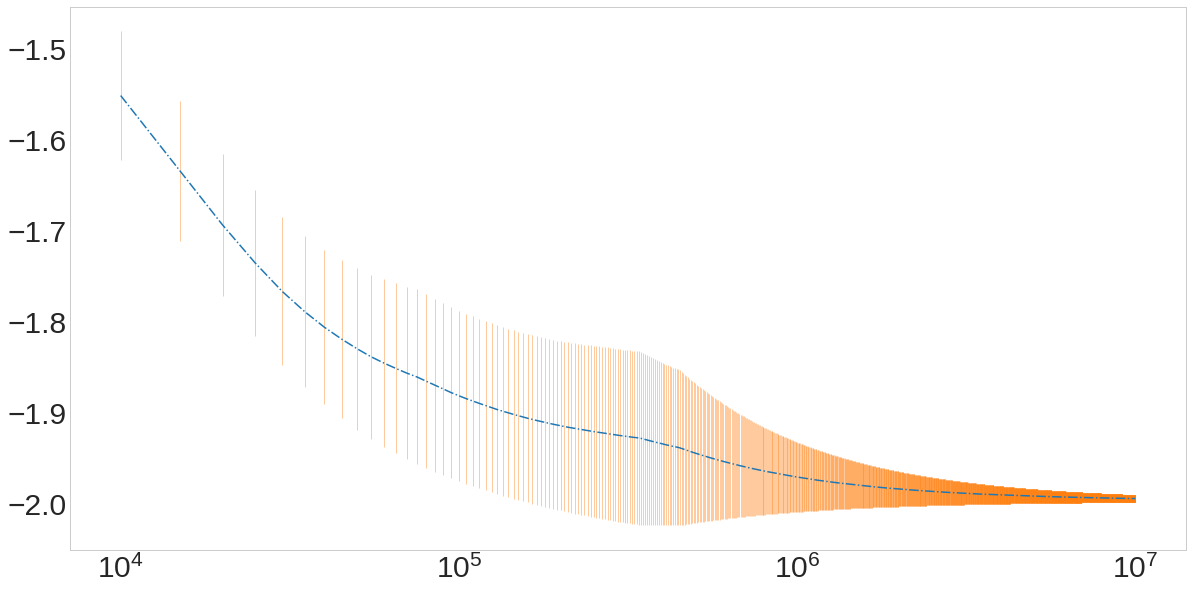

In [3]:
plt.figure(figsize = (20,10))


plt.style.use('seaborn-whitegrid')
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)


#plt.semilogx(DO1T[0][:-2], DO1T[1][:-2], '-.', label = 'T = 1.0')
#plt.errorbar(DO1T[0][:-2], DO1T[1][:-2], DO1T[2][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none')
plt.semilogx(DR1T[0][:-2], DR1T[1][:-2], '-.', ms = 5 , label = 'T = 1.0')
plt.errorbar(DR1T[0][:-2], DR1T[1][:-2], DR1T[2][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none')
#plt.plot(DR24T[0][:-2], DR24T[1][:-2], linewidth = 3,label = 'T = 1.0')
#plt.plot([Data[0][0], Data[0][-1]], [analytical_values[0], analytical_values[0]], linewidth = 3,label = 'T = 1.0')
plt.grid()

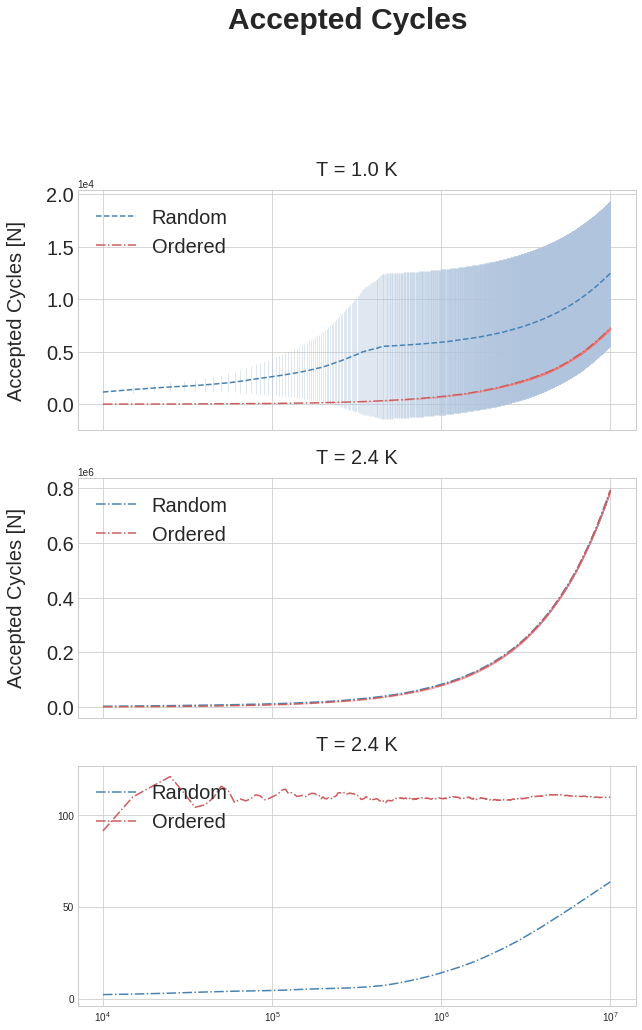

In [4]:
fsize = 20
fig, axs = plt.subplots(3, 1, figsize = (10,15))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Accepted Cycles\n',y=1.05, fontsize=fsize +10, fontweight='bold')

axs[0].set_title('T = 1.0 K', fontsize = fsize, pad = 15)
axs[0].semilogx(DR1T[0][:-2], DR1T[5][:-2], '--', ms = 5 , label = 'Random', c = 'steelblue')
axs[0].semilogx(DO1T[0][:-2], DO1T[5][:-2], '-.', label = 'Ordered', c = 'indianred' )
axs[0].errorbar(DR1T[0][:-2], DR1T[5][:-2], DR1T[6][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightsteelblue')
axs[0].errorbar(DO1T[0][:-2], DO1T[5][:-2], DO1T[6][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightcoral')
axs[0].legend(loc = 'upper left', fontsize = fsize)

axs[1].set_title('T = 2.4 K', fontsize = fsize, pad = 15)
axs[1].semilogx(DR24T[0][:-2], DR24T[5][:-2], '-.', ms = 5 , label = 'Random', c = 'steelblue')
axs[1].semilogx(DO24T[0][:-2], DO24T[5][:-2],  '-.', label = 'Ordered', c = 'indianred'  )
axs[1].errorbar(DR24T[0][:-2], DR24T[5][:-2], DR24T[6][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightsteelblue')
axs[1].errorbar(DO24T[0][:-2], DO24T[5][:-2], DO24T[6][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightcoral')
axs[1].legend(loc = 'upper left', fontsize = fsize)

axs[2].set_title('T = 2.4 K', fontsize = fsize, pad = 15)
axs[2].semilogx(DR24T[0][:-2], DR24T[5][:-2]/DR1T[5][:-2], '-.', ms = 5 , label = 'Random', c = 'steelblue')
axs[2].semilogx(DO24T[0][:-2], DO24T[5][:-2]/DO1T[5][:-2],  '-.', label = 'Ordered', c = 'indianred'  )
axs[2].legend(loc = 'upper left', fontsize = fsize)


axs[1].set_xlabel('Monte Carlo itterations [N]', fontsize = fsize, labelpad = 20)
axs[1].set_ylabel('Accepted Cycles [N]', fontsize = fsize, labelpad = 20)
axs[0].set_ylabel('Accepted Cycles [N]', fontsize = fsize, labelpad = 20)


axs[0].tick_params(labelsize=fsize)
axs[1].tick_params(labelsize=fsize)

import matplotlib
matplotlib.rc('font', size=fsize)

axs[0].ticklabel_format(style='sci',scilimits=(-3,4), axis='y')
axs[1].ticklabel_format(style='sci',scilimits=(-3,4), axis='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig('Plot2.png', bbox_inches='tight')

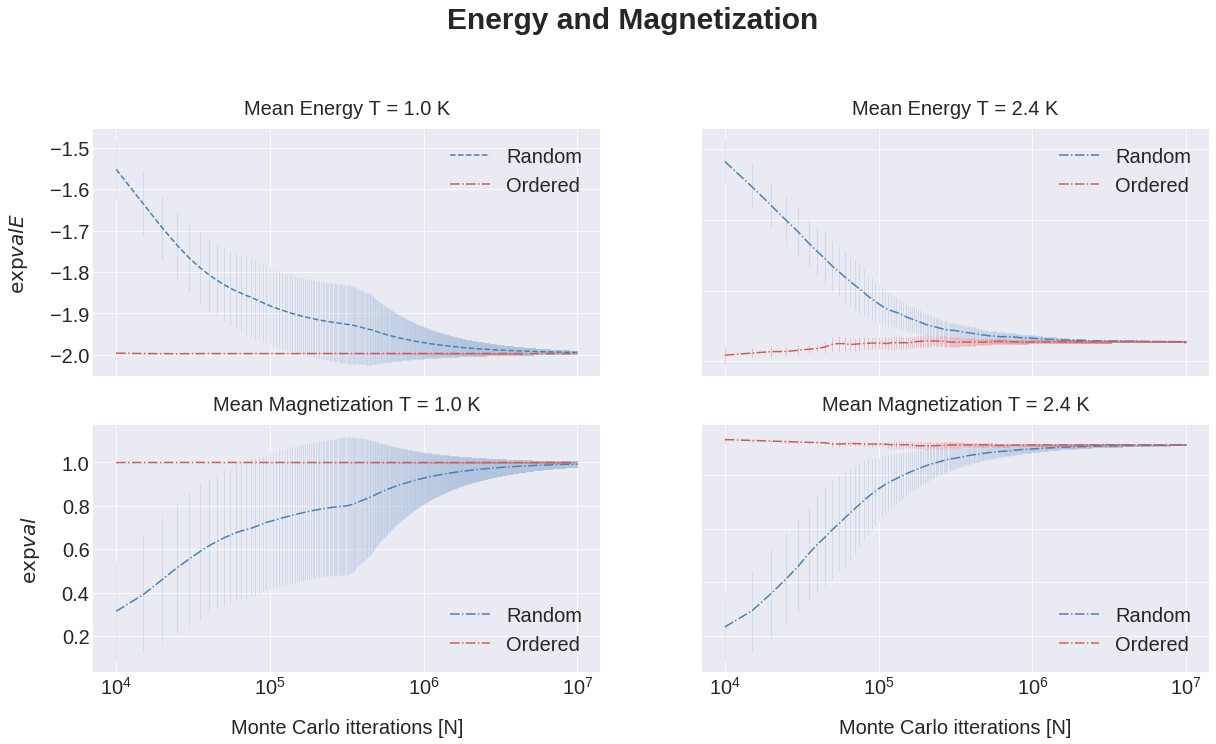

<Figure size 432x288 with 0 Axes>

In [7]:
fsize = 20
fig, axs = plt.subplots(2, 2, figsize = (20,10))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Energy and Magnetization\n',y=1.05, fontsize=fsize +10, fontweight='bold')

axs[0, 0].set_title('Mean Energy T = 1.0 K', fontsize = fsize, pad = 15)
axs[0, 0].semilogx(DR1T[0][:-2], DR1T[1][:-2], '--', ms = 5 , label = 'Random', c = 'steelblue')
axs[0, 0].semilogx(DO1T[0][:-2], DO1T[1][:-2], '-.', label = 'Ordered', c = 'indianred')
axs[0, 0].errorbar(DR1T[0][:-2], DR1T[1][:-2], DR1T[2][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightsteelblue')
axs[0, 0].errorbar(DO1T[0][:-2], DO1T[1][:-2], DO1T[2][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightcoral')
#axs[0, 0].semilogx([DO1T[0][0], DO1T[0][-2]], [-1.996,-1.996], '-.', label = 'Ordered', c = 'green')

axs[0, 0].legend(fontsize = fsize)

axs[1, 0].set_title('Mean Magnetization T = 1.0 K', fontsize = fsize, pad = 15)
axs[1, 0].semilogx(DR1T[0][:-2], DR1T[3][:-2], '-.', ms = 5 , label = 'Random',c = 'steelblue')
axs[1, 0].semilogx(DO1T[0][:-2], DO1T[3][:-2],  '-.', label = 'Ordered', c = 'indianred' )
axs[1, 0].errorbar(DR1T[0][:-2], DR1T[3][:-2], DR1T[4][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightsteelblue')
axs[1, 0].errorbar(DO1T[0][:-2], DO1T[3][:-2], DO1T[4][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightcoral')
axs[1, 0].legend(loc = 'lower right', fontsize = fsize)

axs[0, 1].set_title('Mean Energy T = 2.4 K', fontsize = fsize, pad = 15)
axs[0, 1].semilogx(DR24T[0][:-2], DR24T[1][:-2], '-.', ms = 5 , label = 'Random', c = 'steelblue')
axs[0, 1].semilogx(DO24T[0][:-2], DO24T[1][:-2], '-.', label = 'Ordered', c = 'indianred' )
axs[0, 1].errorbar(DR24T[0][:-2], DR24T[1][:-2], DR24T[2][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightsteelblue')
axs[0, 1].errorbar(DO24T[0][:-2], DO24T[1][:-2], DO24T[2][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightcoral')
#axs[0, 1].semilogx([DO24T[0][0], DOT[0][-2]], [-1.996,-1.996], '-.', label = 'Ordered', c = 'indianred')

axs[0, 1].legend(fontsize = fsize)

axs[1, 1].set_title('Mean Magnetization T = 2.4 K', fontsize = fsize, pad = 15)
axs[1, 1].semilogx(DR24T[0][:-2], DR24T[3][:-2], '-.', ms = 5 , label = 'Random', c = 'steelblue')
axs[1, 1].semilogx(DO24T[0][:-2], DO24T[3][:-2],  '-.', label = 'Ordered',c = 'indianred' )
axs[1, 1].errorbar(DR24T[0][:-2], DR24T[3][:-2], DR24T[4][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightsteelblue')
axs[1, 1].errorbar(DO24T[0][:-2], DO24T[3][:-2], DO24T[4][:-2], alpha  =0.8, linewidth = 0.5, linestyle  ='none', c = 'lightcoral')
axs[1, 1].legend(loc = 'lower right', fontsize = fsize)


axs[1, 0].set_xlabel('Monte Carlo itterations [N]', fontsize = fsize, labelpad = 20)
axs[1, 1].set_xlabel('Monte Carlo itterations [N]', fontsize = fsize, labelpad = 20)
axs[0, 0].set_ylabel('$\expval{E}$', fontsize = fsize, labelpad = 20)
axs[1, 0].set_ylabel('$\expval{\abs{M}}$', fontsize = fsize, labelpad = 20)

axs[0, 0].tick_params(labelsize=fsize)
axs[1, 0].tick_params(labelsize=fsize)
axs[1, 1].tick_params(labelsize=fsize)
axs[0, 1].tick_params(labelsize=22)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()
plt.savefig('Plot4.png', bbox_inches='tight')

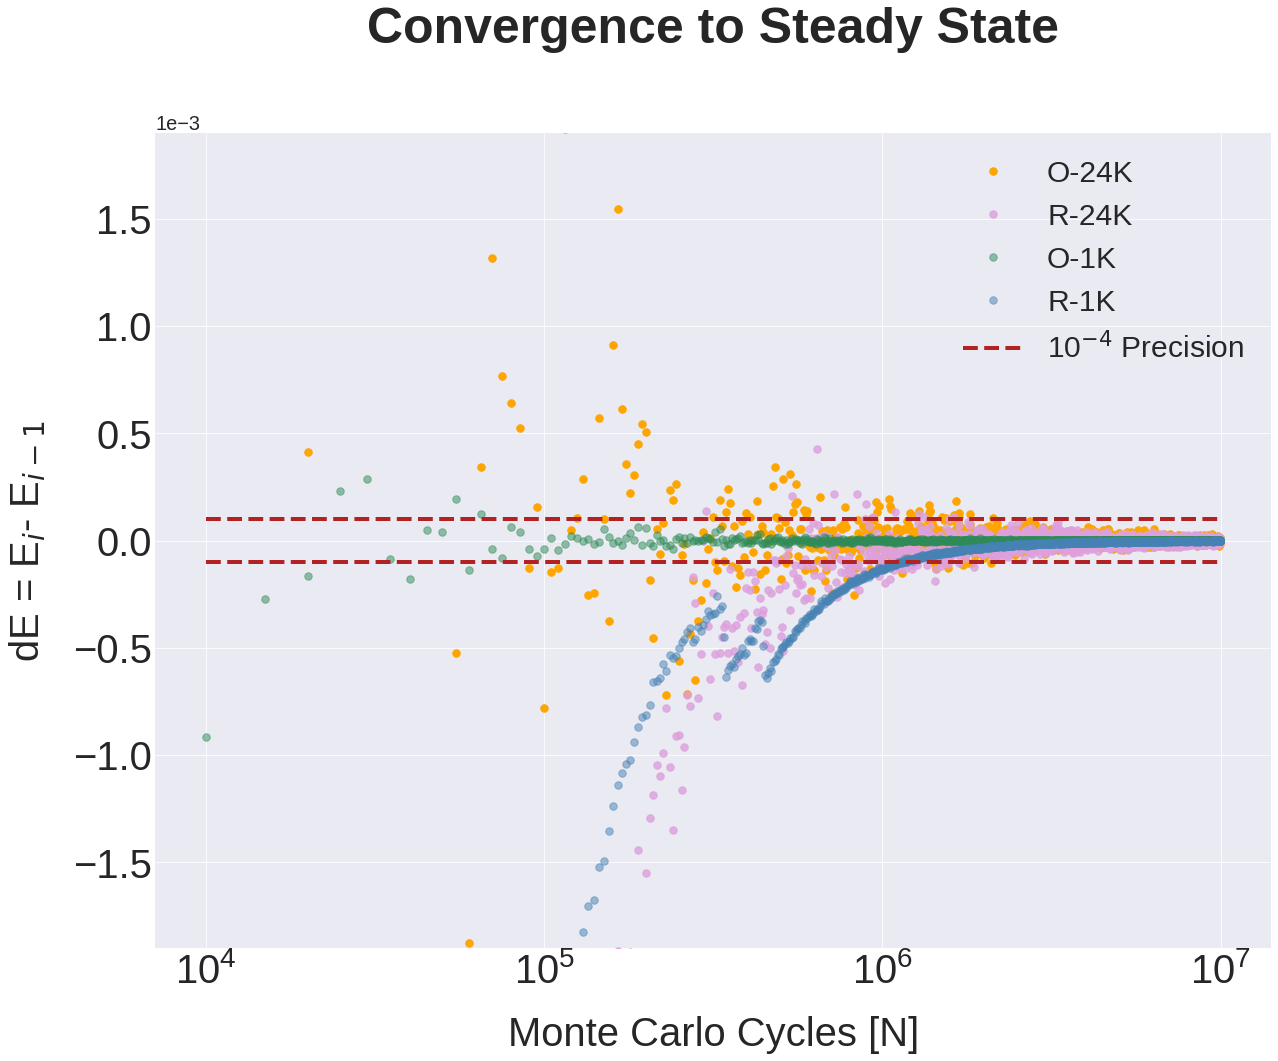

In [6]:
fsize = 40
plt.figure(figsize = (20,15))
plt.title('Convergence to Steady State', fontsize = fsize+10, pad = 90, fontweight='bold')
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)

plt.xlabel('Monte Carlo Cycles [N]', fontsize = fsize, labelpad = 25)
plt.ylabel('dE = E$_i$- E$_{i-1}$',fontsize = fsize, labelpad = 25)


plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))


plt.semilogx(DO24T[0][:-2], DO24T[7][:-3],  '.', ms = 15, c = 'orange',alpha = 1, label = 'O-24K')
plt.semilogx(DR24T[0][:-2], DR24T[7][:-3],  '.', ms = 15, c = 'plum', alpha = 0.8, label = 'R-24K')
plt.semilogx(DO1T[0][:-2], DO1T[7][:-3], '.', ms = 15, c = 'seagreen',alpha = 0.5, label = 'O-1K')
plt.semilogx(DR1T[0][:-2],DR1T[7][:-3],  '.',ms = 15, c = 'steelblue', alpha = 0.5, label = 'R-1K')

plt.plot([DO1T[0][0],DO1T[0][-2]], [1e-4,1e-4], '--',linewidth = 4, c = 'firebrick', label = '10$^{-4}$ Precision')
plt.plot([DO1T[0][0],DO1T[0][-2]], [-1e-4,-1e-4], '--',linewidth = 4, c = 'firebrick')
plt.ylim([-0.0019,0.0019])
plt.legend(fontsize = fsize-10, loc = 'best')

import matplotlib as m
m.rcParams['font.size']= fsize
# Use pastel colors for dots and bright colors for limits
plt.savefig('Plot3.png', bbox_inches='tight')